# Import Dependencies and Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Set

In [2]:
x = [1, 7, 1, 2, 14, 5, 19]
Y = [0, 1, 1, 0, 1, 0, 0]

## Initial data exploration

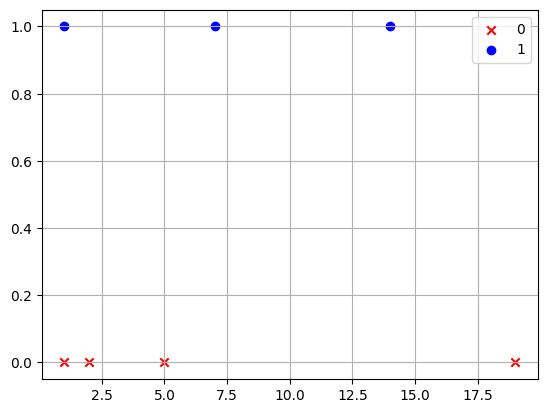

In [3]:
x_zero = [x[i] for i in range(len(x)) if Y[i] == 0]
x_one = [x[i] for i in range(len(x)) if Y[i] == 1]

plt.scatter(x_zero, [0]*len(x_zero), color='red', marker='x', label='0')
plt.scatter(x_one, [1]*len(x_one), color='blue', marker='o', label='1')
plt.grid()
plt.legend();

### Summary statistics

In [4]:
data = pd.DataFrame({'X': x, 'Y': Y})
data.describe()

,X,Y
count,7.0,7.000000
mean,7.0,0.428571
std,7.0,0.534522
min,1.0,0.000000
25%,1.5,0.000000
50%,5.0,0.000000
75%,10.5,1.000000
max,19.0,1.000000


Mean = 7.0

Standard deviation is relatively high at 7.0, suggesting a large spread in the data.

Minimum value is 1.0, and Maximum value is 19.0: Range = 18 which is very large for this set of data

### Class distributions
Checking for class inbalances
Classification problems require balanced datasets as classification algorithms have a 'majority rule'

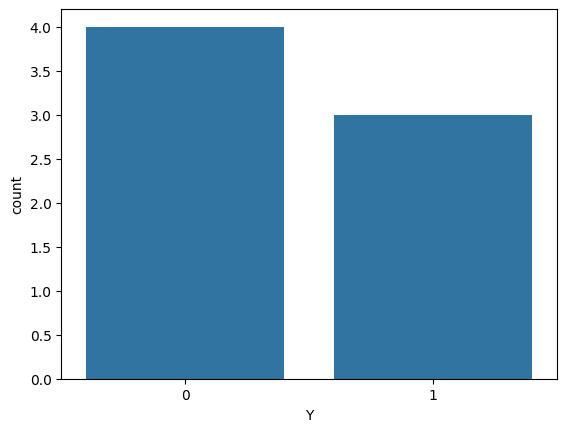

In [5]:
sns.countplot(x='Y', data=data);

### Box plots
Identifying spread of data

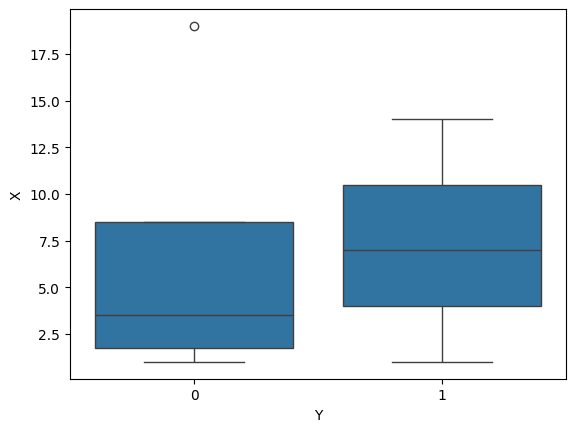

In [6]:
sns.boxplot(x='Y', y='X', data=data)
plt.show()

In [7]:
Q1 = np.percentile(x, 25)
Q3 = np.percentile(x, 75)
IQR = Q3 - Q1
print(Q3)
# Define the threshold
threshold_lower = Q1 - 1.5 * IQR
threshold_upper = Q3 + 1.5 * IQR
print("Lower: ", threshold_lower)
print("Upper", threshold_upper)

10.5
Lower:  -12.0
Upper 24.0


From initial data exploration, although the value 19 is within > Q3+1.5(IQR) which statistically means it is not an outlier, the box and whisker plots show that there is an outlier that is data point 19. Therefore, it will be removed.

In [8]:
max_index = x.index(max(x))
x.pop(max_index)
Y.pop(max_index)
print(x,Y)

[1, 7, 1, 2, 14, 5] [0, 1, 1, 0, 1, 0]


In [9]:
data = pd.DataFrame({'X': x, 'Y': Y})
data.describe()

,X,Y
count,6.00000,6.000000
mean,5.00000,0.500000
std,5.01996,0.547723
min,1.00000,0.000000
25%,1.25000,0.000000
50%,3.50000,0.500000
75%,6.50000,1.000000
max,14.00000,1.000000


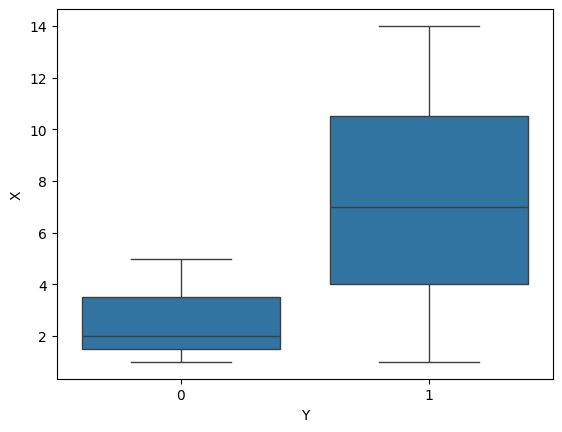

In [10]:
sns.boxplot(x='Y', y='X', data=data)
plt.show()

# Model Training and Testing

In [11]:
x = [[val] for val in x] # Convert to 2D array
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

## Logistic Regression

In [12]:
logistic_regression = LogisticRegression()

# Train the model
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logistic_regression.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)

# Display the results
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", classification_rep_lr)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



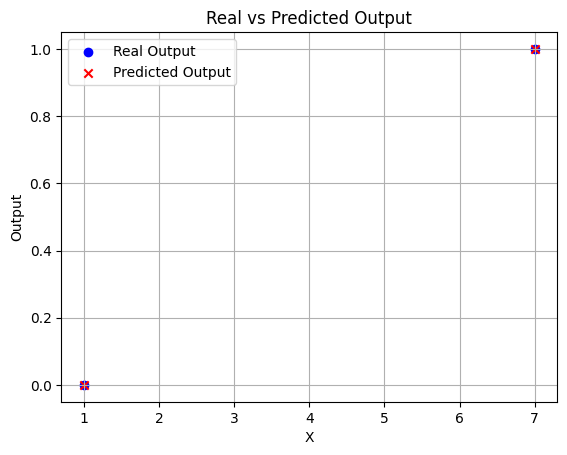

In [23]:
plt.scatter(X_test, y_test, label='Real Output', marker='o', color='blue')
plt.scatter(X_test, y_pred_lr, label='Predicted Output', marker='x', color='red')
plt.xlabel('X')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.title('Real vs Predicted Output');

## K Nearest Neighbours

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn);
classification_rep_knn = classification_report(y_test, y_pred_knn);

print("Real Output:", y_test)
print("Predicted Output:", y_pred_knn)

print("Accuracy:", accuracy_knn);
print("Classification Report:\n", classification_rep_knn);

Real Output: [0, 1]
Predicted Output: [0 0]
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualising result

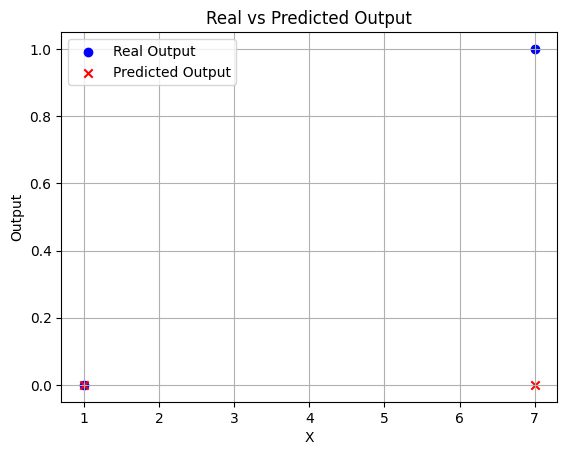

In [14]:
plt.scatter(X_test, y_test, label='Real Output', marker='o', color='blue')
plt.scatter(X_test, y_pred_knn, label='Predicted Output', marker='x', color='red')
plt.xlabel('X')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.title('Real vs Predicted Output');

## Nearest Means

In [15]:
# sort X_train by class
combined = list(zip(X_train, y_train))
sorted_combined = sorted(combined, key=lambda pair: pair[1])
sorted_x, sorted_Y = zip(*sorted_combined)

In [16]:
# Calculate mean on training data
sorted_x_0 = [sorted_x[i] for i in range(len(sorted_x)) if sorted_Y[i] == 0]
sorted_x_1 = [sorted_x[i] for i in range(len(sorted_x)) if sorted_Y[i] == 1]

# Calculate mean for each class
mean_class_0 = np.mean(sorted_x_0)
mean_class_1 = np.mean(sorted_x_1)

midpoint = (mean_class_0 + mean_class_1) / 2

In [17]:
def predict_class(new_data_point, midpoint):
    if new_data_point < midpoint:
        return 0
    else:
        return 1

In [18]:
# Test mean on test data
y_pred_nm = []
for i in X_test:
  y_pred_nm.append(predict_class(i, midpoint))

Real Output: [0, 1]
Predicted Output: [0, 1]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



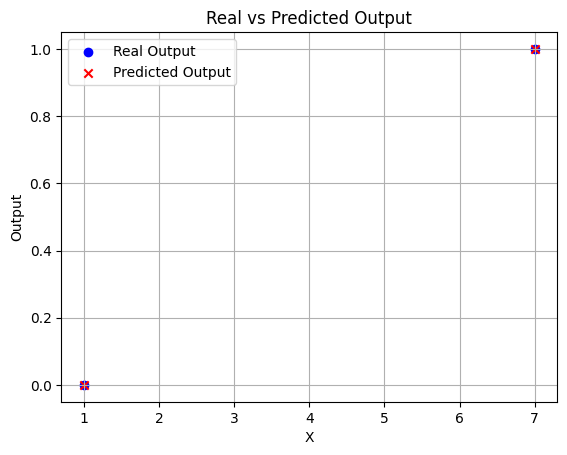

In [19]:
accuracy_nm = accuracy_score(y_test, y_pred_nm);
classification_rep_nm = classification_report(y_test, y_pred_nm);

print("Real Output:", y_test)
print("Predicted Output:", y_pred_nm)

print("Accuracy:", accuracy_nm);
print("Classification Report:\n", classification_rep_nm);

plt.scatter(X_test, y_test, label='Real Output', marker='o', color='blue')
plt.scatter(X_test, y_pred_nm, label='Predicted Output', marker='x', color='red')
plt.xlabel('X')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.title('Real vs Predicted Output');

## SVM

In [20]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



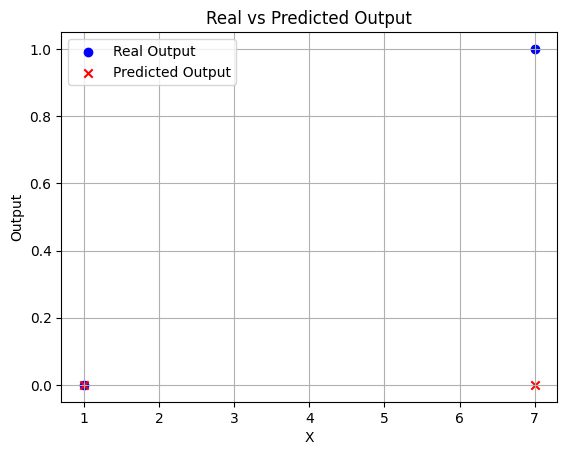

In [21]:
svm_classifier = SVC(kernel='linear', C=1)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display the results
print("Accuracy:", accuracy_svm)
print("Classification Report:\n", classification_rep_svm)

plt.scatter(X_test, y_test, label='Real Output', marker='o', color='blue')
plt.scatter(X_test, y_pred_svm, label='Predicted Output', marker='x', color='red')
plt.xlabel('X')
plt.ylabel('Output')
plt.grid()
plt.legend()
plt.title('Real vs Predicted Output');

# Results and Summary

Text(0, 0.5, 'Accuracy')

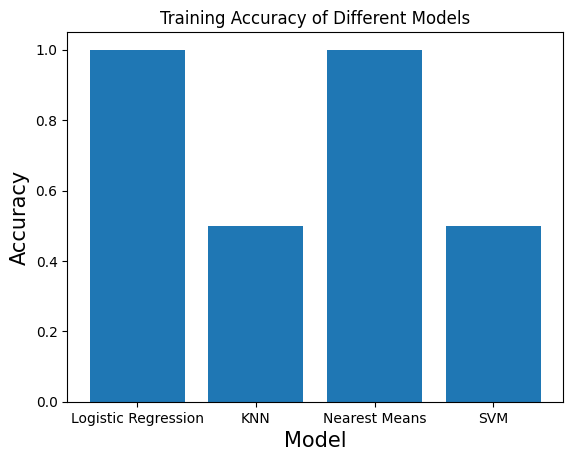

In [22]:
# Accuracy Comparison Plots
model_name = ['Logistic Regression','KNN', 'Nearest Means', 'SVM']
model_accuracy = [accuracy_lr, accuracy_knn, accuracy_nm, accuracy_svm]

plt.bar(model_name, model_accuracy)
plt.title('Training Accuracy of Different Models')
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

In this small 2 class dataset, we experiment with 4 different machine learning models (K-Nearest Neighbors, K-Means, Support Vector Machine, Logistic Regression) to classify a dataset.

As the dataset is so small, the final result classification cannot give an accurate representation for if the data scaled larger, however, it gives a good basic overview of the typical process taken to forecast data from, EDA, data preprocessing, training, testing and evaluating.

In this particular project, we see that the 'simpler' models: Logistic Regression and Nearest means perform best. This could be due to a few reasons:

Linear separability: If the dataset is easily separable by a linear decision boundary, models that work well with linear separation, such as Logistic Regression, may perform better.

Overfitting: SVM and KNN, being more complex models, might be prone to overfitting if not properly regularised

Sensitivity to Parameters: SVM and KNN both have hyperparamters that can be tuned to improve performance. Tuning hyperparameters through techniques like grid search or cross-validation might improve their performance.

Future work to expand on this project should require more data so that the model performance can be truely evaluated, and more steps such as parameter tuning can be possible.